In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/Food_Delivery_Times.csv')

In [3]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


# 1. EDA

In [4]:
df.shape

(1000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [6]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [7]:
df['Delivery_Time_min'].min()

8

In [26]:
df['Delivery_Time_min'].max()

153

In [8]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [9]:
df.duplicated().sum()

0

# 2. Data cleaning 

2.1 null values handel

In [10]:
obj_col = df.select_dtypes('object')
for col in obj_col:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean())

In [12]:
def Distance(x):
    if x > 0 and x <= 5:
        return 'Very close'
    elif x > 5 and x <= 10:
        return 'Close'
    elif x > 5 and x <= 10:
        return 'Midrange'
    elif x > 10 and x <= 15:
        return 'Far'
    elif x > 15 and x <= 20:
        return 'So far'
df['Distance_category'] = df['Distance_km'].apply(Distance)

2.2 outliers handel

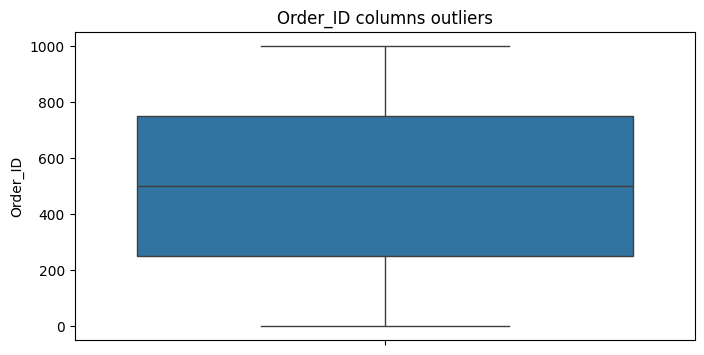

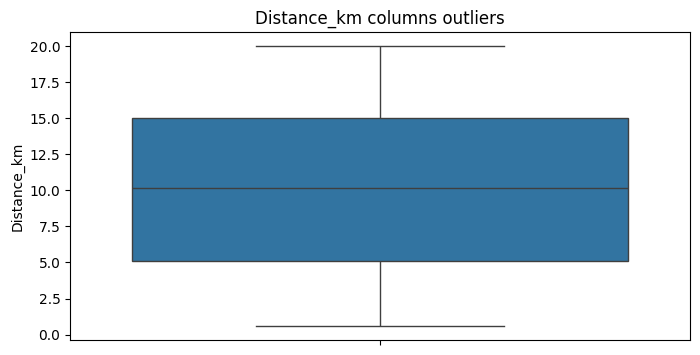

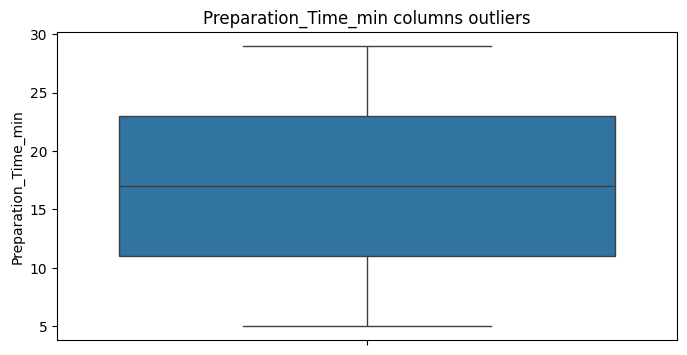

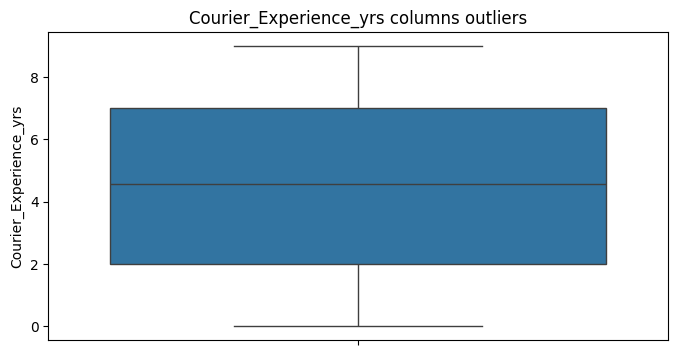

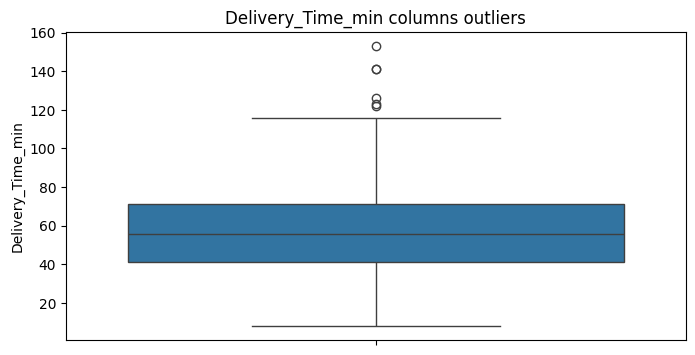

In [13]:
num_col = df.select_dtypes(['int', 'float'])
for col in num_col:
    plt.figure(figsize = (8,4))
    sns.boxplot(df[col])
    plt.title(f'{col} columns outliers')
    plt.show()

# 3. Feature Engineering

3.1 Drop the order id column

In [14]:
df = df.drop(['Order_ID'], axis = 1)

3.2 covert km into meter 

In [15]:
df['Distance_km'] = df['Distance_km']*1000

# 4. Visualization

4.1 Weather vs delivery time

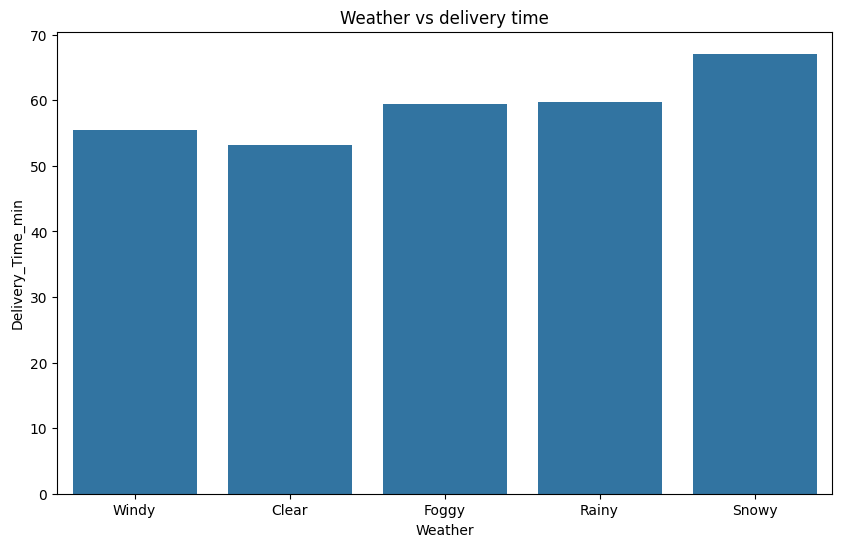

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Weather',
            y = 'Delivery_Time_min',
            data = df,
            errorbar=None)
plt.title('Weather vs delivery time')
plt.show()

4.2 Traffic_Level vs Delivery time 

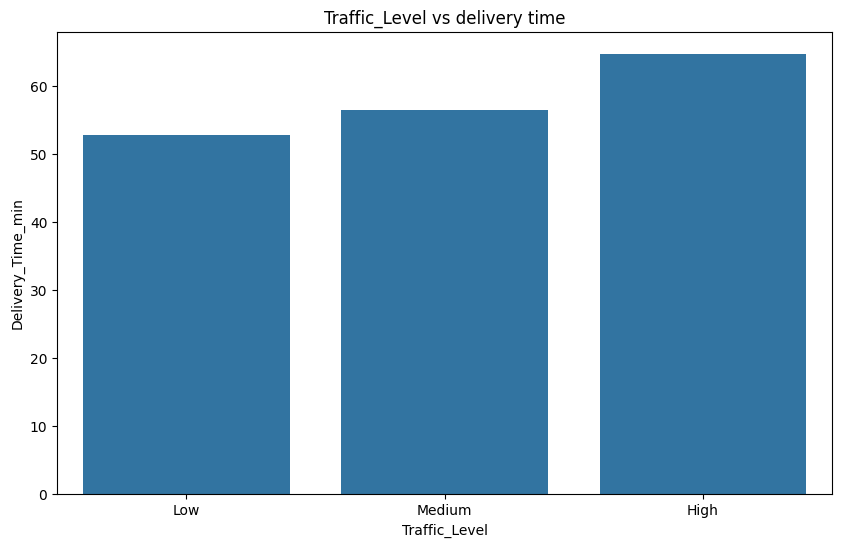

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Traffic_Level',
            y = 'Delivery_Time_min',
            data = df,
            errorbar=None)
plt.title('Traffic_Level vs delivery time')
plt.show()

4.3 Time_of_Day vs Delivery time 

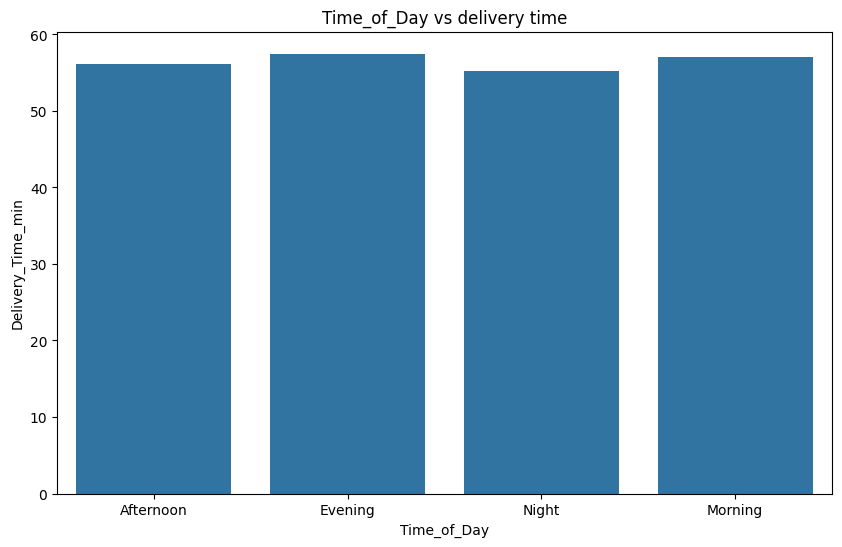

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Time_of_Day',
            y = 'Delivery_Time_min',
            data = df,
            errorbar=None)
plt.title('Time_of_Day vs delivery time')
plt.show()

4.4 Vehicle_Type vs Delivery time

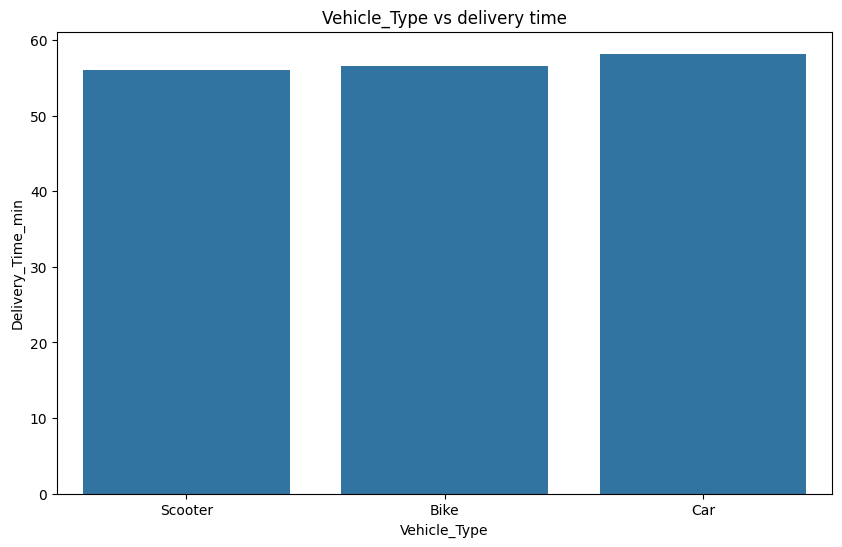

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Vehicle_Type',
            y = 'Delivery_Time_min',
            data = df,
            errorbar=None)
plt.title('Vehicle_Type vs delivery time')
plt.show()

4.5 Distance_km vs Delivery time

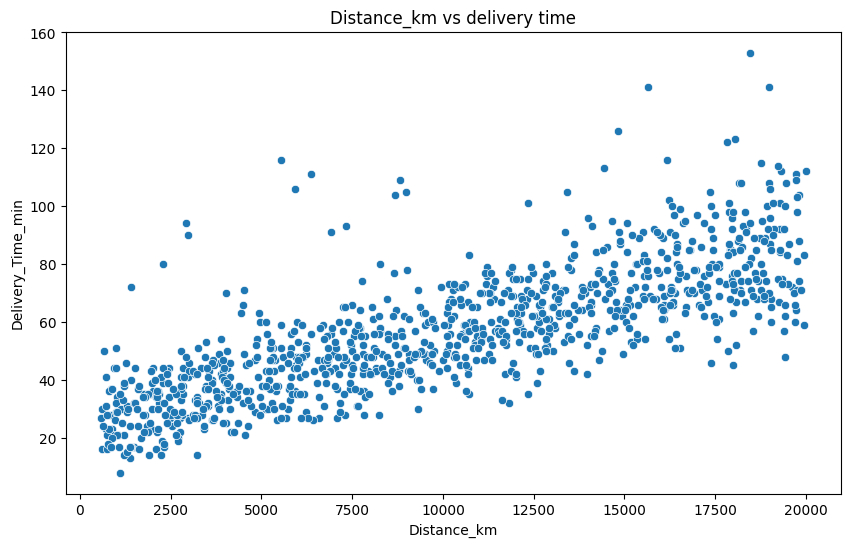

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Distance_km',
            y = 'Delivery_Time_min',
            data = df)
plt.title('Distance_km vs delivery time')
plt.show()

4.5 Distance_category vs delivery time

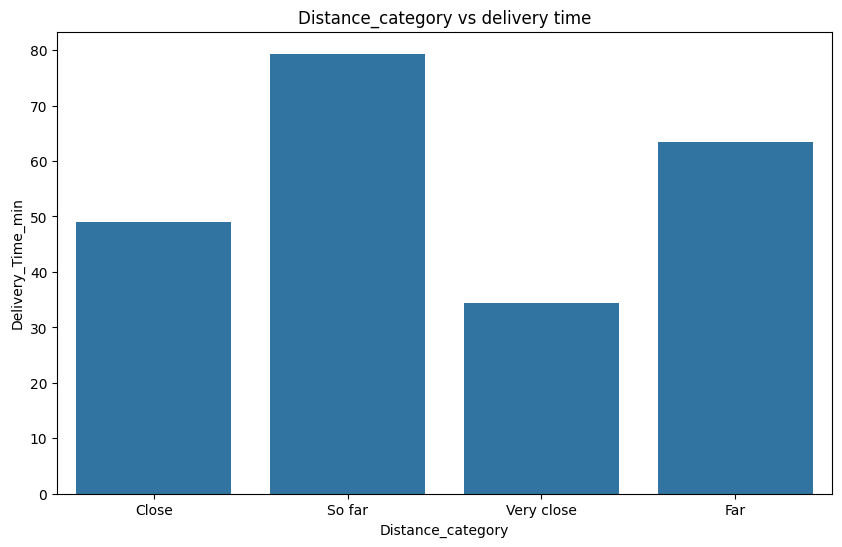

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Distance_category',
            y = 'Delivery_Time_min',
            data = df,
            errorbar = None)
plt.title('Distance_category vs delivery time')
plt.show()

4.6 Preparation_Time_min vs Delivery time

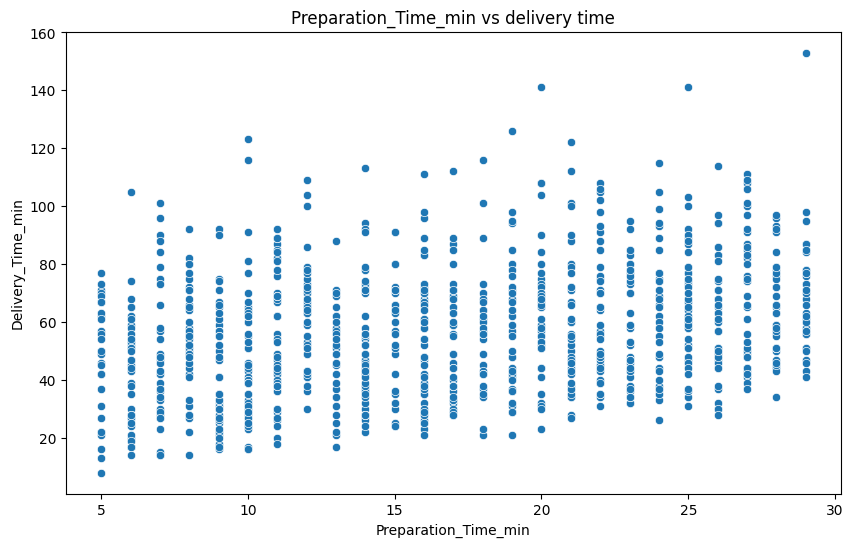

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Preparation_Time_min',
            y = 'Delivery_Time_min',
            data = df)
plt.title('Preparation_Time_min vs delivery time')
plt.show()

4.7 Courier_Experience_yrs vs Delivery time 

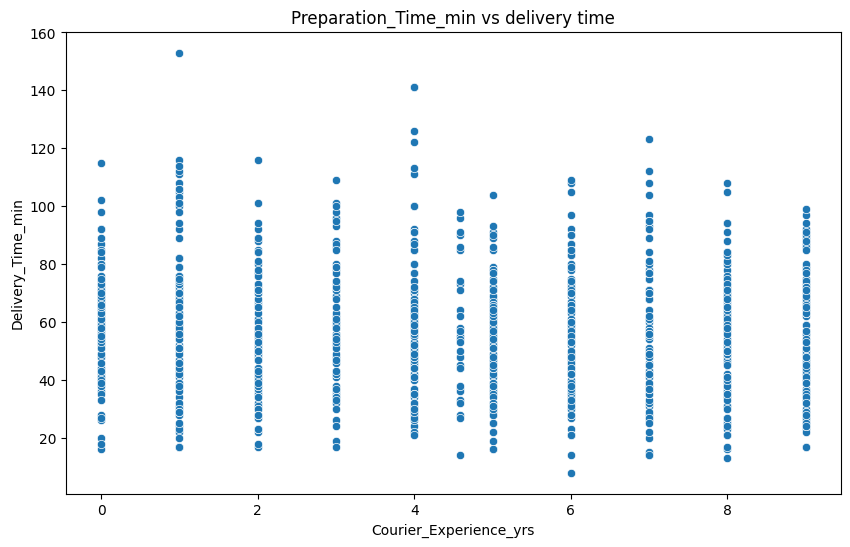

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Courier_Experience_yrs',
            y = 'Delivery_Time_min',
            data = df)
plt.title('Preparation_Time_min vs delivery time')
plt.show()

4.8 Distribution of my Target column

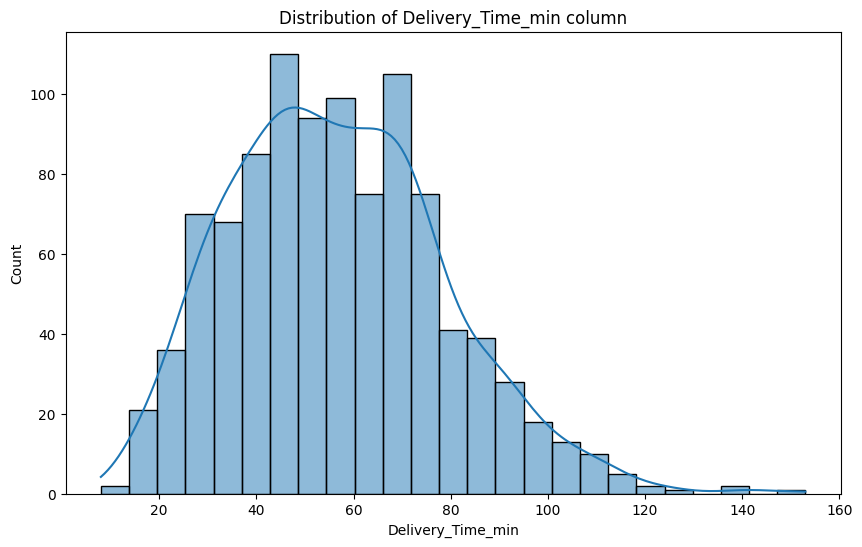

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df['Delivery_Time_min'], kde = True)
plt.title('Distribution of Delivery_Time_min column')
plt.show()

In [25]:
df.to_csv('Clean_data.csv', index= False)